<a href="https://colab.research.google.com/github/AzulCou/Learning-algorithms/blob/master/Amazon_Business_Research_Analyst_Hiring_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## For running the notebook in colab 

from google.colab import files

uploaded = files.upload()

Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


In [ ]:
##Read the data
import pandas as pd

train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

## target column and id column is defined. 
##Columns dropped : FitmentPercent : target, EmpName : id column (not used since sample file doesnt call for it), BiasInfluentialFactor : null col
fitment = train['FitmentPercent']
test_emp_id = test['EmpID']
train.drop(['FitmentPercent', 'EmpName', 'BiasInfluentialFactor'], axis=1, inplace=True)
test.drop(['EmpName'], axis=1, inplace=True)

In [ ]:

train

,EmpID,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,11041,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,12,2009,21,26,Married,5,SSE,Enterprise,Design,20
1,15079,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,2018,15,19,Married,5,BA,MidSized,Engineering,6
2,18638,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,6,2015,15,24,Single,5,SDE,MidSized,Engineering,19
3,3941,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,6,2015,16,24,Married,5,SDE,Startup,Product,16
4,5936,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,2,2019,24,32,Married,5,SDE,Enterprise,Engineering,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13640,19504,English,25,Female,JR87525,Dual MBA,Electrical,Tier 2,7,2,2019,30,34,Married,3,SDE,Startup,Engineering,5
13641,17071,Native,29,Other,JR87525,Dual M.Tech,Computer Science,Tier 1,7,6,2015,22,28,Married,4,SSE,Startup,Customer Success,14
13642,6659,Hindi,37,Male,JR88873,M.Tech,Artificial Intelligence,Tier 1,8,11,2010,8,16,Single,4,SDE,Enterprise,Design,20
13643,5986,Hindi,24,Male,JR87525,B.Tech,Electrical,Tier 2,4,1,2020,27,36,Single,4,SDE,MidSized,Engineering,7


In [ ]:
## appended to apply feature transformation at a go. the other option is creating custom function and applying separately on train and test
all_df =  train.append(test, ignore_index=True)

In [ ]:
all_df

,EmpID,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,GraduationYear,CurrentCTC,ExpectedCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken
0,11041,English,35,Male,JR85289,B.Tech,Electrical,Tier 1,7,12,2009,21,26,Married,5,SSE,Enterprise,Design,20
1,15079,English,26,Male,JR87525,B.Tech,Artificial Intelligence,Tier 3,7,3,2018,15,19,Married,5,BA,MidSized,Engineering,6
2,18638,English,36,Female,JR87525,PhD,Computer Science,Tier 1,6,6,2015,15,24,Single,5,SDE,MidSized,Engineering,19
3,3941,English,29,Female,JR87525,BCA,Information Technology,Tier 2,5,6,2015,16,24,Married,5,SDE,Startup,Product,16
4,5936,English,25,Male,JR70175,Dual M.Tech,Computer Science,Tier 3,8,2,2019,24,32,Married,5,SDE,Enterprise,Engineering,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22385,14758,English,26,Female,JR85289,B.Tech,Computer Science,Tier 1,10,3,2018,29,38,Married,5,SDE,Startup,Design,10
22386,23544,Hindi,27,Male,JR85289,MS,Electrical,Tier 1,10,1,2020,18,26,Married,4,BA,Startup,Design,19
22387,16175,English,27,Male,JR85289,B.Tech,Computer Science,Tier 2,7,4,2017,7,17,Married,4,SDE,Startup,Engineering,12
22388,18458,English,33,Male,JR79193,MS,Electrical and Electronics,Tier 1,7,7,2014,8,18,Married,4,SSE,Enterprise,Design,10


In [ ]:
## convert graduation year to string

all_df.GraduationYear = all_df.GraduationYear.astype(str)

In [ ]:
#get one hot encodings
all_dummy_df = pd.get_dummies(all_df)

In [ ]:
all_dummy_df

,EmpID,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_English,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Female,Gender_Male,Gender_Other,JobProfileIDApplyingFor_JR70175,JobProfileIDApplyingFor_JR79193,JobProfileIDApplyingFor_JR81165,JobProfileIDApplyingFor_JR85289,JobProfileIDApplyingFor_JR87525,JobProfileIDApplyingFor_JR88654,JobProfileIDApplyingFor_JR88873,JobProfileIDApplyingFor_JR88879,JobProfileIDApplyingFor_JR89890,HighestDegree_B.Tech,HighestDegree_BCA,HighestDegree_Dual M.Tech,HighestDegree_Dual MBA,HighestDegree_M.Tech,HighestDegree_MCA,HighestDegree_MS,HighestDegree_PhD,DegreeBranch_Artificial Intelligence,DegreeBranch_Computer Science,DegreeBranch_Electrical,DegreeBranch_Electrical and Electronics,DegreeBranch_Electronics,DegreeBranch_Information Technology,GraduatingInstitute_Tier 1,GraduatingInstitute_Tier 2,GraduatingInstitute_Tier 3,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017,GraduationYear_2018,GraduationYear_2019,GraduationYear_2020,MartialStatus_Married,MartialStatus_Single,CurrentDesignation_BA,CurrentDesignation_DA,CurrentDesignation_DE,CurrentDesignation_DS,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_Enterprise,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Customer Success,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,11041,35,7,12,21,26,5,20,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
1,15079,26,7,3,15,19,5,6,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,18638,36,6,6,15,24,5,19,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,3941,29,5,6,16,24,5,16,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,5936,25,8,2,24,32,5,10,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22385,14758,26,10,3,29,38,5,10,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
22386,23544,27,10,1,18,26,4,19,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
22387,16175,27,7,4,7,17,4,12,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
22388,18458,33,7,7,8,18,4,10,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0


In [ ]:
train.shape[0]

13645

In [ ]:
## separate to train test 
dummy_train_df = all_dummy_df.loc[:train.shape[0]-1]
dummy_test_df = all_dummy_df.loc[train.shape[0]:]

In [ ]:
dummy_train_df

,EmpID,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_English,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Female,Gender_Male,Gender_Other,JobProfileIDApplyingFor_JR70175,JobProfileIDApplyingFor_JR79193,JobProfileIDApplyingFor_JR81165,JobProfileIDApplyingFor_JR85289,JobProfileIDApplyingFor_JR87525,JobProfileIDApplyingFor_JR88654,JobProfileIDApplyingFor_JR88873,JobProfileIDApplyingFor_JR88879,JobProfileIDApplyingFor_JR89890,HighestDegree_B.Tech,HighestDegree_BCA,HighestDegree_Dual M.Tech,HighestDegree_Dual MBA,HighestDegree_M.Tech,HighestDegree_MCA,HighestDegree_MS,HighestDegree_PhD,DegreeBranch_Artificial Intelligence,DegreeBranch_Computer Science,DegreeBranch_Electrical,DegreeBranch_Electrical and Electronics,DegreeBranch_Electronics,DegreeBranch_Information Technology,GraduatingInstitute_Tier 1,GraduatingInstitute_Tier 2,GraduatingInstitute_Tier 3,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017,GraduationYear_2018,GraduationYear_2019,GraduationYear_2020,MartialStatus_Married,MartialStatus_Single,CurrentDesignation_BA,CurrentDesignation_DA,CurrentDesignation_DE,CurrentDesignation_DS,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_Enterprise,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Customer Success,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,11041,35,7,12,21,26,5,20,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
1,15079,26,7,3,15,19,5,6,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,18638,36,6,6,15,24,5,19,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,3941,29,5,6,16,24,5,16,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,5936,25,8,2,24,32,5,10,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13640,19504,25,7,2,30,34,3,5,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
13641,17071,29,7,6,22,28,4,14,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0
13642,6659,37,8,11,8,16,4,20,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
13643,5986,24,4,1,27,36,4,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
dummy_test_df

,EmpID,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_English,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Female,Gender_Male,Gender_Other,JobProfileIDApplyingFor_JR70175,JobProfileIDApplyingFor_JR79193,JobProfileIDApplyingFor_JR81165,JobProfileIDApplyingFor_JR85289,JobProfileIDApplyingFor_JR87525,JobProfileIDApplyingFor_JR88654,JobProfileIDApplyingFor_JR88873,JobProfileIDApplyingFor_JR88879,JobProfileIDApplyingFor_JR89890,HighestDegree_B.Tech,HighestDegree_BCA,HighestDegree_Dual M.Tech,HighestDegree_Dual MBA,HighestDegree_M.Tech,HighestDegree_MCA,HighestDegree_MS,HighestDegree_PhD,DegreeBranch_Artificial Intelligence,DegreeBranch_Computer Science,DegreeBranch_Electrical,DegreeBranch_Electrical and Electronics,DegreeBranch_Electronics,DegreeBranch_Information Technology,GraduatingInstitute_Tier 1,GraduatingInstitute_Tier 2,GraduatingInstitute_Tier 3,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017,GraduationYear_2018,GraduationYear_2019,GraduationYear_2020,MartialStatus_Married,MartialStatus_Single,CurrentDesignation_BA,CurrentDesignation_DA,CurrentDesignation_DE,CurrentDesignation_DS,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_Enterprise,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Customer Success,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
13645,5664,35,5,5,27,34,4,18,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
13646,23568,35,9,12,29,33,4,8,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
13647,21490,28,9,2,18,25,3,18,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
13648,8363,37,8,11,7,12,5,17,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
13649,6165,36,7,6,22,32,4,9,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22385,14758,26,10,3,29,38,5,10,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
22386,23544,27,10,1,18,26,4,19,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
22387,16175,27,7,4,7,17,4,12,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
22388,18458,33,7,7,8,18,4,10,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0


In [ ]:
#append target column 
dummy_train_df['FitmentPercent'] = fitment

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
## Used automl to find the best xgboost model. 
!pip install H2O
import pandas as pd 
import h2o
from h2o.automl import H2OAutoML
h2o.init(nthreads = 1, max_mem_size= 12)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 hours 10 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,10 days
H2O_cluster_name:,H2O_from_python_unknownUser_9atl1f
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.94 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,1
H2O_cluster_status:,"locked, healthy"


In [ ]:
trainamazondum = h2o.H2OFrame(dummy_train_df)
testamazondum = h2o.H2OFrame(dummy_test_df)

y = 'FitmentPercent'
EmpID = testamazondum['EmpID']

X = list(trainamazondum.columns)
X.remove(y)
X.remove(EmpID)
X


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


['Age',
 'LatestDegreeCGPA',
 'YearsOfExperince',
 'CurrentCTC',
 'ExpectedCTC',
 'EmpScore',
 'TotalLeavesTaken',
 'LanguageOfCommunication_English',
 'LanguageOfCommunication_Hindi',
 'LanguageOfCommunication_Native',
 'Gender_Female',
 'Gender_Male',
 'Gender_Other',
 'JobProfileIDApplyingFor_JR70175',
 'JobProfileIDApplyingFor_JR79193',
 'JobProfileIDApplyingFor_JR81165',
 'JobProfileIDApplyingFor_JR85289',
 'JobProfileIDApplyingFor_JR87525',
 'JobProfileIDApplyingFor_JR88654',
 'JobProfileIDApplyingFor_JR88873',
 'JobProfileIDApplyingFor_JR88879',
 'JobProfileIDApplyingFor_JR89890',
 'HighestDegree_B.Tech',
 'HighestDegree_BCA',
 'HighestDegree_Dual M.Tech',
 'HighestDegree_Dual MBA',
 'HighestDegree_M.Tech',
 'HighestDegree_MCA',
 'HighestDegree_MS',
 'HighestDegree_PhD',
 'DegreeBranch_Artificial Intelligence',
 'DegreeBranch_Computer Science',
 'DegreeBranch_Electrical',
 'DegreeBranch_Electrical and Electronics',
 'DegreeBranch_Electronics',
 'DegreeBranch_Information Technolo

In [ ]:
amlamazondum = H2OAutoML(max_runtime_secs=100, nfolds=0, seed=1)

amlamazondum.train(x = X, y = y, training_frame = trainamazondum)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
lb = amlamazondum.leaderboard
lb.head(rows = lb.nrows)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
GBM_5_AutoML_20210530_174658,78.7798,8.8758,78.7798,7.23298,0.136832
XGBoost_3_AutoML_20210530_174658,79.4188,8.91173,79.4188,7.23787,0.136656
GBM_grid__1_AutoML_20210530_174658_model_3,79.7742,8.93164,79.7742,7.29695,0.13727
GBM_1_AutoML_20210530_174658,79.949,8.94142,79.949,7.28521,0.137367
GBM_grid__1_AutoML_20210530_174658_model_5,80.8291,8.9905,80.8291,7.30507,0.138545
XGBoost_grid__1_AutoML_20210530_174658_model_5,80.9413,8.99674,80.9413,7.32378,0.138102
GBM_2_AutoML_20210530_174658,81.0614,9.00341,81.0614,7.31555,0.138441
GBM_3_AutoML_20210530_174658,81.3439,9.01909,81.3439,7.34287,0.138917
GBM_grid__1_AutoML_20210530_174658_model_4,81.4967,9.02755,81.4967,7.31738,0.138245
GBM_4_AutoML_20210530_174658,82.6821,9.09297,82.6821,7.3832,0.140278


In [ ]:
#get model list
model_ids = list(amlamazondum.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [ ]:
# extract first xgboost model : best performing 
m = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [ ]:
## replicate the automl model using xgboost. this is because explainability using automl is slightly messed up 
mapping_dict = {
        "booster": "booster",
        "colsample_bylevel": "col_sample_rate",
        "colsample_bytree": "col_sample_rate_per_tree",
        "gamma": "min_split_improvement",
        "learning_rate": "learn_rate",
        "max_delta_step": "max_delta_step",
        "max_depth": "max_depth",
        "min_child_weight": "min_rows",
        "n_estimators": "ntrees",
        "nthread": "nthread",
        "reg_alpha": "reg_alpha",
        "reg_lambda": "reg_lambda",
        "subsample": "sample_rate",
        "seed": "seed",

        # "max_delta_step": "score_tree_interval",
        #  'missing': None,
        #  'objective': 'binary:logistic',
        #  'scale_pos_weight': 1,
        #  'silent': 1,
        #  'base_score': 0.5,
}

parameter_from_water = {}
for item in mapping_dict.items():
    parameter_from_water[item[0]] = m.params[item[1]]['actual']
# parameter_from_water


In [ ]:
import xgboost as xgb
##xgboost regressor defined 
xgb_reg = xgb.XGBRegressor(**parameter_from_water)
xgb_reg.fit(dummy_train_df.drop(['EmpID', 'FitmentPercent'], axis=1), dummy_train_df['FitmentPercent'])

[17:52:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0.0,
             max_depth=5, min_child_weight=3.0, missing=None,
             n_estimators=10000, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=0, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=1,
             seed=3, silent=None, subsample=0.8, verbosity=1)

In [ ]:
xgb_reg


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0.0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0.0,
             max_depth=5, min_child_weight=3.0, missing=None,
             n_estimators=10000, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=0, reg_alpha=0.0, reg_lambda=1.0, scale_pos_weight=1,
             seed=3, silent=None, subsample=0.8, verbosity=1)

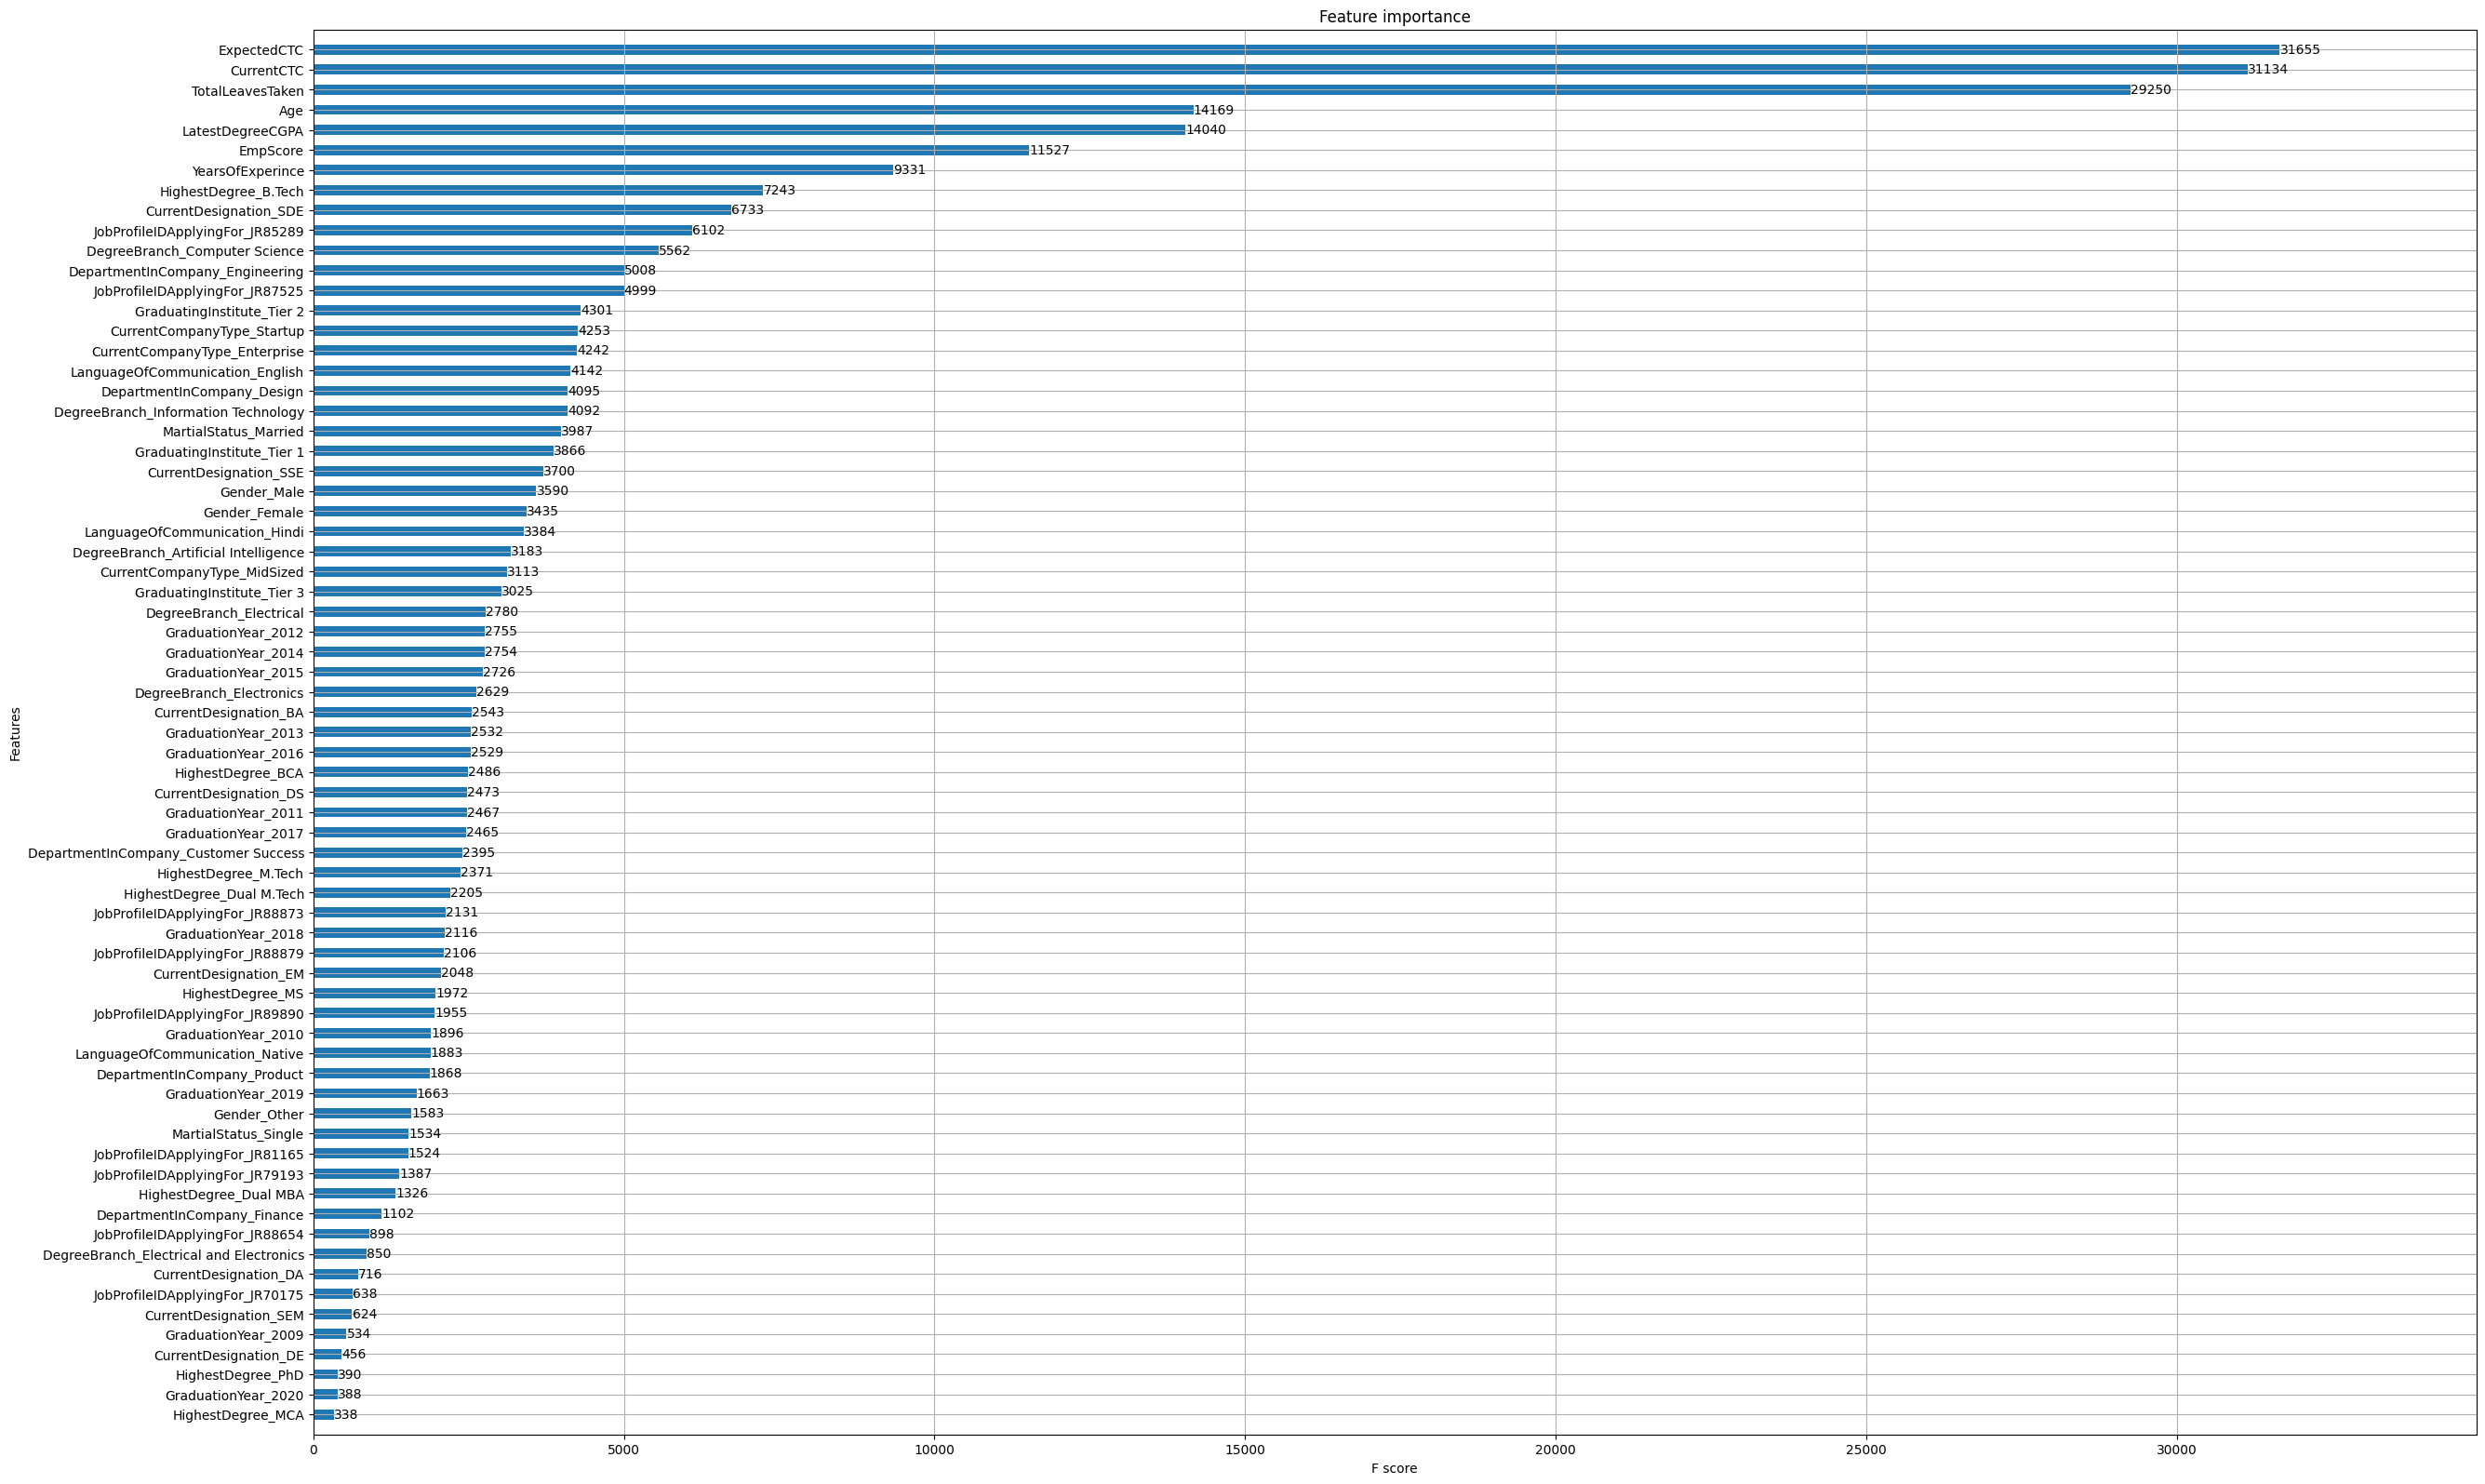

In [ ]:
#variable importance plot 

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30,20]
plt.rcParams['figure.dpi'] = 100

xgb.plot_importance(xgb_reg, height = 0.5)
plt.show()




In [ ]:
##predict on test 
predict_value = xgb_reg.predict(dummy_test_df.drop(['EmpID'], axis = 1))

In [ ]:
dummy_test_df['FitmentPercent'] =predict_value.tolist()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dummy_test_df

,EmpID,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_English,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Female,Gender_Male,Gender_Other,JobProfileIDApplyingFor_JR70175,JobProfileIDApplyingFor_JR79193,JobProfileIDApplyingFor_JR81165,JobProfileIDApplyingFor_JR85289,JobProfileIDApplyingFor_JR87525,JobProfileIDApplyingFor_JR88654,JobProfileIDApplyingFor_JR88873,JobProfileIDApplyingFor_JR88879,JobProfileIDApplyingFor_JR89890,HighestDegree_B.Tech,HighestDegree_BCA,HighestDegree_Dual M.Tech,HighestDegree_Dual MBA,HighestDegree_M.Tech,HighestDegree_MCA,HighestDegree_MS,HighestDegree_PhD,DegreeBranch_Artificial Intelligence,DegreeBranch_Computer Science,DegreeBranch_Electrical,DegreeBranch_Electrical and Electronics,DegreeBranch_Electronics,DegreeBranch_Information Technology,GraduatingInstitute_Tier 1,GraduatingInstitute_Tier 2,GraduatingInstitute_Tier 3,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017,GraduationYear_2018,GraduationYear_2019,GraduationYear_2020,MartialStatus_Married,MartialStatus_Single,CurrentDesignation_BA,CurrentDesignation_DA,CurrentDesignation_DE,CurrentDesignation_DS,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_Enterprise,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Customer Success,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product,predictions
13645,5664,35,5,5,27,34,4,18,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,88.282524
13646,23568,35,9,12,29,33,4,8,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,94.398735
13647,21490,28,9,2,18,25,3,18,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,75.696411
13648,8363,37,8,11,7,12,5,17,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,49.530125
13649,6165,36,7,6,22,32,4,9,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,73.774261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22385,14758,26,10,3,29,38,5,10,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,82.901886
22386,23544,27,10,1,18,26,4,19,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,66.089973
22387,16175,27,7,4,7,17,4,12,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,70.871048
22388,18458,33,7,7,8,18,4,10,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,50.247314


In [ ]:
dummyfnal = dummy_test_df.copy()

In [ ]:
dummyfnal.drop(['predictions','EmpID'],axis = 1, inplace=True)

In [ ]:
dummyfnal

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_English,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Female,Gender_Male,Gender_Other,JobProfileIDApplyingFor_JR70175,JobProfileIDApplyingFor_JR79193,JobProfileIDApplyingFor_JR81165,JobProfileIDApplyingFor_JR85289,JobProfileIDApplyingFor_JR87525,JobProfileIDApplyingFor_JR88654,JobProfileIDApplyingFor_JR88873,JobProfileIDApplyingFor_JR88879,JobProfileIDApplyingFor_JR89890,HighestDegree_B.Tech,HighestDegree_BCA,HighestDegree_Dual M.Tech,HighestDegree_Dual MBA,HighestDegree_M.Tech,HighestDegree_MCA,HighestDegree_MS,HighestDegree_PhD,DegreeBranch_Artificial Intelligence,DegreeBranch_Computer Science,DegreeBranch_Electrical,DegreeBranch_Electrical and Electronics,DegreeBranch_Electronics,DegreeBranch_Information Technology,GraduatingInstitute_Tier 1,GraduatingInstitute_Tier 2,GraduatingInstitute_Tier 3,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017,GraduationYear_2018,GraduationYear_2019,GraduationYear_2020,MartialStatus_Married,MartialStatus_Single,CurrentDesignation_BA,CurrentDesignation_DA,CurrentDesignation_DE,CurrentDesignation_DS,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_Enterprise,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Customer Success,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
13645,35,5,5,27,34,4,18,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
13646,35,9,12,29,33,4,8,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
13647,28,9,2,18,25,3,18,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
13648,37,8,11,7,12,5,17,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
13649,36,7,6,22,32,4,9,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22385,26,10,3,29,38,5,10,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
22386,27,10,1,18,26,4,19,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
22387,27,7,4,7,17,4,12,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0
22388,33,7,7,8,18,4,10,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0


In [ ]:
##get the feature importance 

dictweights = dict(zip(dummy_train_df.drop(['EmpID', 'FitmentPercent'], axis =1).columns,xgb_reg.feature_importances_))
dictweight = pd.DataFrame(dictweights, index=[0])
dictweight =  dictweight[dummyfnal.columns]
dictweight 

,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_English,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Female,Gender_Male,Gender_Other,JobProfileIDApplyingFor_JR70175,JobProfileIDApplyingFor_JR79193,JobProfileIDApplyingFor_JR81165,JobProfileIDApplyingFor_JR85289,JobProfileIDApplyingFor_JR87525,JobProfileIDApplyingFor_JR88654,JobProfileIDApplyingFor_JR88873,JobProfileIDApplyingFor_JR88879,JobProfileIDApplyingFor_JR89890,HighestDegree_B.Tech,HighestDegree_BCA,HighestDegree_Dual M.Tech,HighestDegree_Dual MBA,HighestDegree_M.Tech,HighestDegree_MCA,HighestDegree_MS,HighestDegree_PhD,DegreeBranch_Artificial Intelligence,DegreeBranch_Computer Science,DegreeBranch_Electrical,DegreeBranch_Electrical and Electronics,DegreeBranch_Electronics,DegreeBranch_Information Technology,GraduatingInstitute_Tier 1,GraduatingInstitute_Tier 2,GraduatingInstitute_Tier 3,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017,GraduationYear_2018,GraduationYear_2019,GraduationYear_2020,MartialStatus_Married,MartialStatus_Single,CurrentDesignation_BA,CurrentDesignation_DA,CurrentDesignation_DE,CurrentDesignation_DS,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_Enterprise,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Customer Success,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
0,0.00627,0.006472,0.005965,0.014895,0.009236,0.022807,0.006086,0.005417,0.005845,0.008055,0.12034,0.03652,0.229456,0.010035,0.007729,0.008466,0.004174,0.005007,0.0112,0.007638,0.007798,0.007877,0.003457,0.008016,0.007911,0.011434,0.007495,0.014156,0.00752,0.012851,0.005815,0.004953,0.006287,0.007504,0.006576,0.005794,0.00552,0.004852,0.007273,0.007451,0.005179,0.004732,0.005613,0.005027,0.005247,0.00575,0.006164,0.005704,0.006164,0.006046,0.005159,0.005855,0.005549,0.006807,0.009529,0.012819,0.007888,0.008399,0.003443,0.010974,0.005587,0.118656,0.006082,0.019686,0.008038,0.005677,0.004816,0.009786,0.007466


In [ ]:
import numpy as np

In [ ]:
## mutiply feature importance with feature value to get the most influential features for each instance

dummyfnal = dummyfnal.multiply(np.array(dictweight), axis='columns')


,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_English,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Female,Gender_Male,Gender_Other,JobProfileIDApplyingFor_JR70175,JobProfileIDApplyingFor_JR79193,JobProfileIDApplyingFor_JR81165,JobProfileIDApplyingFor_JR85289,JobProfileIDApplyingFor_JR87525,JobProfileIDApplyingFor_JR88654,JobProfileIDApplyingFor_JR88873,JobProfileIDApplyingFor_JR88879,JobProfileIDApplyingFor_JR89890,HighestDegree_B.Tech,HighestDegree_BCA,HighestDegree_Dual M.Tech,HighestDegree_Dual MBA,HighestDegree_M.Tech,HighestDegree_MCA,HighestDegree_MS,HighestDegree_PhD,DegreeBranch_Artificial Intelligence,DegreeBranch_Computer Science,DegreeBranch_Electrical,DegreeBranch_Electrical and Electronics,DegreeBranch_Electronics,DegreeBranch_Information Technology,GraduatingInstitute_Tier 1,GraduatingInstitute_Tier 2,GraduatingInstitute_Tier 3,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017,GraduationYear_2018,GraduationYear_2019,GraduationYear_2020,MartialStatus_Married,MartialStatus_Single,CurrentDesignation_BA,CurrentDesignation_DA,CurrentDesignation_DE,CurrentDesignation_DS,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_Enterprise,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Customer Success,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product
13645,0.219459,0.032361,0.029824,0.402172,0.314028,0.091227,0.109554,0.000000,0.000000,0.008055,0.00000,0.03652,0.000000,0.0,0.000000,0.0,0.004174,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.012851,0.000000,0.000000,0.000000,0.000000,0.0,0.005794,0.00000,0.004852,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.006164,0.000000,0.000000,0.000000,0.000000,0.000000,0.005549,0.000000,0.0,0.0,0.000000,0.000000,0.003443,0.0,0.000000,0.118656,0.0,0.000000,0.0,0.000000,0.000000,0.009786,0.000000
13646,0.219459,0.058250,0.071577,0.431962,0.304792,0.091227,0.048691,0.005417,0.000000,0.000000,0.00000,0.03652,0.000000,0.0,0.000000,0.0,0.004174,0.000000,0.0,0.0,0.0,0.000000,0.003457,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.005794,0.00000,0.000000,0.007273,0.007451,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005855,0.000000,0.000000,0.0,0.0,0.000000,0.008399,0.000000,0.0,0.000000,0.118656,0.0,0.000000,0.0,0.000000,0.004816,0.000000,0.000000
13647,0.175567,0.058250,0.011930,0.268114,0.230903,0.068420,0.109554,0.005417,0.000000,0.000000,0.00000,0.03652,0.000000,0.0,0.000000,0.0,0.000000,0.005007,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.007495,0.0,0.00000,0.000000,0.005815,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.004852,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.006046,0.000000,0.005855,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.003443,0.0,0.000000,0.000000,0.0,0.019686,0.0,0.000000,0.004816,0.000000,0.000000
13648,0.231999,0.051777,0.065612,0.104267,0.110833,0.114034,0.103468,0.000000,0.005845,0.000000,0.00000,0.03652,0.000000,0.0,0.000000,0.0,0.000000,0.005007,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.00752,0.000000,0.000000,0.004953,0.000000,0.000000,0.0,0.000000,0.00000,0.004852,0.000000,0.000000,0.005179,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005549,0.000000,0.0,0.0,0.007888,0.000000,0.000000,0.0,0.000000,0.118656,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.007466
13649,0.225729,0.045305,0.035789,0.327695,0.295556,0.091227,0.054777,0.000000,0.005845,0.000000,0.12034,0.00000,0.000000,0.0,0.000000,0.0,0.004174,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.00000

In [ ]:
dummy_test_df

,EmpID,Age,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,ExpectedCTC,EmpScore,TotalLeavesTaken,LanguageOfCommunication_English,LanguageOfCommunication_Hindi,LanguageOfCommunication_Native,Gender_Female,Gender_Male,Gender_Other,JobProfileIDApplyingFor_JR70175,JobProfileIDApplyingFor_JR79193,JobProfileIDApplyingFor_JR81165,JobProfileIDApplyingFor_JR85289,JobProfileIDApplyingFor_JR87525,JobProfileIDApplyingFor_JR88654,JobProfileIDApplyingFor_JR88873,JobProfileIDApplyingFor_JR88879,JobProfileIDApplyingFor_JR89890,HighestDegree_B.Tech,HighestDegree_BCA,HighestDegree_Dual M.Tech,HighestDegree_Dual MBA,HighestDegree_M.Tech,HighestDegree_MCA,HighestDegree_MS,HighestDegree_PhD,DegreeBranch_Artificial Intelligence,DegreeBranch_Computer Science,DegreeBranch_Electrical,DegreeBranch_Electrical and Electronics,DegreeBranch_Electronics,DegreeBranch_Information Technology,GraduatingInstitute_Tier 1,GraduatingInstitute_Tier 2,GraduatingInstitute_Tier 3,GraduationYear_2009,GraduationYear_2010,GraduationYear_2011,GraduationYear_2012,GraduationYear_2013,GraduationYear_2014,GraduationYear_2015,GraduationYear_2016,GraduationYear_2017,GraduationYear_2018,GraduationYear_2019,GraduationYear_2020,MartialStatus_Married,MartialStatus_Single,CurrentDesignation_BA,CurrentDesignation_DA,CurrentDesignation_DE,CurrentDesignation_DS,CurrentDesignation_EM,CurrentDesignation_SDE,CurrentDesignation_SEM,CurrentDesignation_SSE,CurrentCompanyType_Enterprise,CurrentCompanyType_MidSized,CurrentCompanyType_Startup,DepartmentInCompany_Customer Success,DepartmentInCompany_Design,DepartmentInCompany_Engineering,DepartmentInCompany_Finance,DepartmentInCompany_Product,predictions,BiasInfluenceFactor,FitmentPercent
13645,5664,35,5,5,27,34,4,18,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,88.282524,Age,88.282524
13646,23568,35,9,12,29,33,4,8,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,94.398735,Age,94.398735
13647,21490,28,9,2,18,25,3,18,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,75.696411,Age,75.696411
13648,8363,37,8,11,7,12,5,17,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,49.530125,Age,49.530125
13649,6165,36,7,6,22,32,4,9,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,73.774261,Age,73.774261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22385,14758,26,10,3,29,38,5,10,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,82.901886,ExpectedCTC,82.901886
22386,23544,27,10,1,18,26,4,19,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,66.089973,Age,66.089973
22387,16175,27,7,4,7,17,4,12,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,70.871048,Age,70.871048
22388,18458,33,7,7,8,18,4,10,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,50.247314,Age,50.247314


In [ ]:
## from feature LanguageofCommunication_English remove English to get the initial attribute names 
bias = dummyfnal.idxmax(axis=1)
dummy_test_df['BiasInfluentialFactor'] = bias.apply(lambda L: L.split('_')[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
submissionfile = dummy_test_df[['EmpID', 'BiasInfluentialFactor', 'FitmentPercent']]

In [ ]:

submissionfile.to_csv('predictions.csv', index = False)

In [ ]:
## for colab notebook 
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

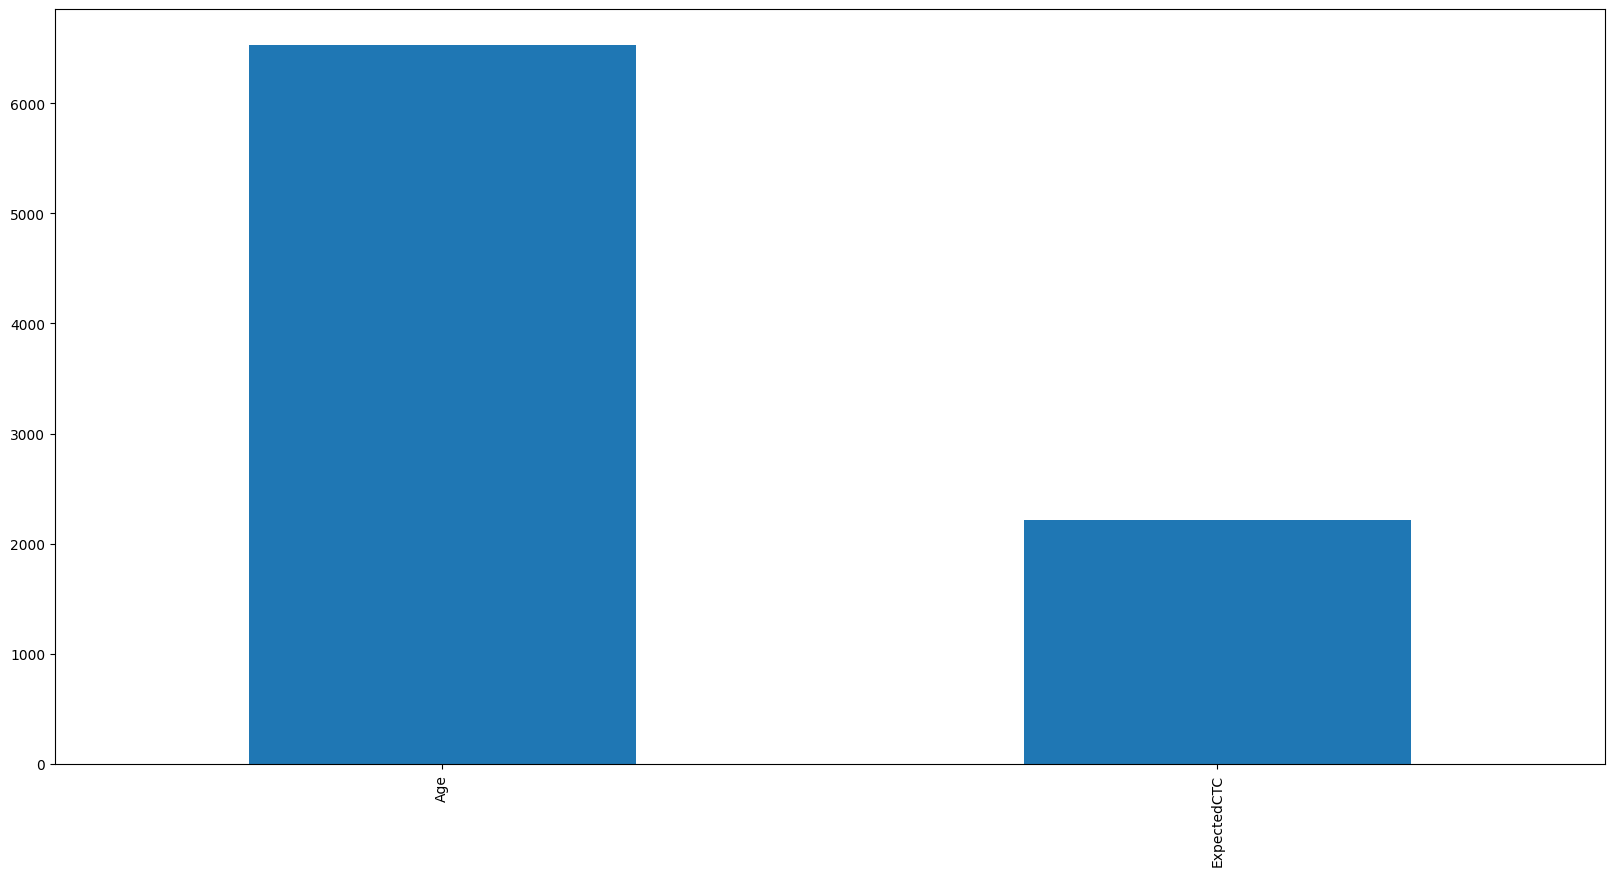

In [ ]:
plt.figure(figsize = (20,10))
pd.value_counts(submissionfile['BiasInfluentialFactor']).plot.bar()
plt.show()